# LOAN DATA PREDICTION


In [1]:
# Importing supporting libraries
# Current environment - Python 3

# For algebra
import numpy as np 

# For data(csv file) reading, processing and dataframe manipulation
# also for using datetime functionality 
import pandas as pd

# For decent presentation
from termcolor import colored
 
# For plotting and visualizing the graph
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# # lets you ZOOM IN/OUT the images 
# # due to introduction of this library each plotting will have prominant axes
# import mpld3
# mpld3.enable_notebook()

# For label encoding
from sklearn import preprocessing



# FOR PREDICTION OR MODEL PREPARATION PURPOSES
# Splits dataset to test train portion according to given split rate
from sklearn.cross_validation import train_test_split

# For Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier

# For Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# For K Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

# For SVC classifier
from sklearn.svm import SVC

# For Classification Report
from sklearn.metrics import classification_report

# For Confusion Matrix
from sklearn.metrics import confusion_matrix

# For Score Evaluation
from sklearn.model_selection import cross_val_score


C:\Users\Pakhi\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Loading and Exploring the Loan Dataset



# ABOUT THE DATASET
## Dataset Context: 
This dataset includes customers who have paid off their loans, who have been past due and put into the collection without paying back their loan and interests, and who have paid off only after they were put in the collection. The financial product is a bullet loan that customers should pay off all of their loan debt in just one time by the end of the term, instead of an installment schedule. Of course, they could pay off earlier than their pay schedule.

## Dataset Column Details:
1. Loan_id: A unique loan number assigned to each loan customers
2. Loan_status: Whether a loan is paid off, in collection, new customer yet to pay off, or paid off after the collection efforts
3. Principal Basic: principal loan amount at the origination
4. terms: Can be weekly (7 days), biweekly, and monthly payoff schedule
5. Effective_date: When the loan got originated and took effects
6. Due_date: Since it’s one-time payoff schedule, each loan has one single due date
7. Paidoff_time: The actual time a customer pays off the loan
8. Pastdue_days: How many days a loan has been past due
9. Age, education, gender: A customer’s basic demographic information

In [2]:
# Untouched data
orig_data = pd.read_csv('Loan payments data.csv')
# all the alterations will be done in this
data = orig_data.copy() 

data.head() 

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,09/08/16,10/07/16,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,09/08/16,10/07/16,10/07/16 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,09/08/16,10/07/16,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,09/08/16,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,09/09/16,10/08/16,9/23/2016 21:36,NaN,28,college,female


#### FEATURES OF THE LOAN DATASET

In [3]:
# printing the features in a list format for better understanding
print(colored("FEATURES OF THE LOAN DATASET:",'red',attrs=['bold','underline']))

for i in range(len(data.columns)):
               print(colored(i+1, attrs=['bold']), data.columns[i])

FEATURES OF THE LOAN DATASET:
1 Loan_ID
2 loan_status
3 Principal
4 terms
5 effective_date
6 due_date
7 paid_off_time
8 past_due_days
9 age
10 education
11 Gender


#### DESCRIPTION OF DATASET

In [4]:
print(colored("SHAPE OF DATASET:",'red',attrs=['bold']), data.shape[0], "X",data.shape[1] )
print(colored("\nDESCRIPTION OF DATASET:",'red',attrs=['bold','underline']))
data.describe()

SHAPE OF DATASET: 454 X 11

DESCRIPTION OF DATASET:


,Principal,terms,past_due_days,age
count,454.000000,454.000000,170.000000,454.000000
mean,940.969163,22.625551,36.341176,30.973568
std,118.284029,8.055320,29.557507,6.103537
min,300.000000,7.000000,1.000000,18.000000
25%,900.000000,15.000000,3.000000,26.000000
50%,1000.000000,30.000000,44.000000,30.000000
75%,1000.000000,30.000000,60.000000,35.000000
max,1000.000000,30.000000,76.000000,51.000000


#### INFORMATION ABOUT LOAN DATASET

In [5]:
# getting information about loan dataset
print(colored("INFORMATION ABOUT LOAN DATASET:",'red',attrs=['bold','underline']))
data.info()

INFORMATION ABOUT LOAN DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 11 columns):
Loan_ID           454 non-null object
loan_status       454 non-null object
Principal         454 non-null int64
terms             454 non-null int64
effective_date    454 non-null object
due_date          454 non-null object
paid_off_time     369 non-null object
past_due_days     170 non-null float64
age               454 non-null int64
education         454 non-null object
Gender            454 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 39.1+ KB


#### NULL VALUE DESCRIPTION

In [6]:
print(colored("NULL VALUE DESCRIPTION:",'red',attrs=['bold','underline']))
data.isnull().sum()

NULL VALUE DESCRIPTION:


Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time      85
past_due_days     284
age                 0
education           0
Gender              0
dtype: int64

### Take Away:
* From the above information it is clear that out of 454 total enteries, 2 features including paid_off_time and past_due_days have missing values.

#### CALCULATING MISSING VALUE PERCENTAGE

In [7]:
## Finding null values if exists in any column of the dataset
null_values = []
missing_per = []

for i in range(len(data.columns)):
    current_feature = data[ data.columns[i] ]
    
    if  (current_feature.isnull().values.any()):        
        sum_of_null_values = current_feature.isnull().sum()      
        null_value_percentage = (sum_of_null_values/len(current_feature))*100  
#         print(sum_of_null_values)
        
        null_values.append(sum_of_null_values)
        missing_per.append(null_value_percentage)
    
null_values = list(set(null_values))
missing_per = list(set(missing_per))

models = pd.DataFrame({
        'Feature name'  : ['paid_off_time', 'paid_off_days'],
        'Total null values'  : [null_values[0], null_values[1]],
        'Missing Value Percentage' :[missing_per[1], missing_per[0]] })
models.sort_values(by='Total null values', ascending=False)

,Feature name,Missing Value Percentage,Total null values
0,paid_off_time,62.555066,284
1,paid_off_days,18.722467,85


#### Note:
Since, the percentage of missing values is quite considerable especially for past_due_days feature, we should test and try how its removal might affect the accuracy of the intended prediction which will be studied in further sections.

#### Checking Unique Values For Each Column

In [8]:
## LOOKING FOR UNIQUE VALUES OF COLUMNS OF INTEREST
## coi = [1,2,3,4,5,6,,9,10]

# Unique values for each attribute/feature  
print(colored("UNIQUE VALUES OF EACH ATTRIBUTE OF DATASET:",'green',attrs=['bold','underline']))  
for i in range(1,11):
    print(colored(i, "red", attrs=['bold']),
          colored(data.columns[i], "red", attrs=['bold'] ), 
          data[data.columns[i]].unique(),"\n")
    

UNIQUE VALUES OF EACH ATTRIBUTE OF DATASET:
1 loan_status ['PAIDOFF' 'COLLECTION' 'COLLECTION_PAIDOFF'] 

2 Principal [1000  300  800  900  700  500] 

3 terms [30 15  7] 

4 effective_date ['09/08/16' '09/09/16' '09/10/16' '09/11/16' '09/12/16' '9/13/2016'
 '9/14/2016'] 

5 due_date ['10/07/16' '9/22/2016' '10/08/16' '9/15/2016' '9/24/2016' '9/16/2016'
 '10/09/16' '10/10/16' '9/25/2016' '9/17/2016' '11/09/16' '10/25/2016'
 '9/18/2016' '9/26/2016' '10/26/2016' '10/11/16' '11/10/16' '9/19/2016'
 '10/12/16' '9/27/2016' '9/28/2016' '10/13/2016' '11/12/16' '9/23/2016'
 '11/07/16'] 

6 paid_off_time ['9/14/2016 19:31' '10/07/16 9:00' '9/25/2016 16:58' '9/22/2016 20:00'
 '9/23/2016 21:36' '09/09/16 13:45' '10/07/16 23:07' '10/05/16 20:33'
 '10/08/16 16:00' '9/24/2016 13:00' '09/11/16 19:11' '10/09/16 16:00'
 '10/07/16 23:32' '9/13/2016 21:57' '9/15/2016 14:27' '9/24/2016 16:00'
 '9/27/2016 14:21' '9/23/2016 18:49' '10/05/16 22:05' '9/23/2016 7:42'
 '10/09/16 9:00' '10/08/16 17:09' '10/09/16 

#### Checking Count Of Unique Values For Each Column

In [9]:
print(colored("VALUE COUNT OF EACH ATTRIBUTE OF DATASET:",'green',attrs=['bold','underline']))
for i in range(1,11):
    print(colored(i, "red", attrs=['bold']),
          colored(data.columns[i], "red", attrs=['bold'] ), "\n",
          data[data.columns[i]].value_counts(),"\n")
    

VALUE COUNT OF EACH ATTRIBUTE OF DATASET:
1 loan_status 
 PAIDOFF               284
COLLECTION_PAIDOFF     85
COLLECTION             85
Name: loan_status, dtype: int64 

2 Principal 
 1000    339
800     103
300       6
500       3
900       2
700       1
Name: Principal, dtype: int64 

3 terms 
 30    242
15    191
7      21
Name: terms, dtype: int64 

4 effective_date 
 09/11/16     220
09/12/16     129
09/10/16      46
9/13/2016     23
9/14/2016     17
09/09/16      15
09/08/16       4
Name: effective_date, dtype: int64 

5 due_date 
 10/10/16      120
9/25/2016      82
10/11/16       58
9/26/2016      54
10/09/16       28
9/24/2016      17
9/27/2016      12
10/13/2016     10
10/12/16        8
11/10/16        8
9/17/2016       7
10/08/16        7
11/09/16        7
9/23/2016       6
9/28/2016       6
9/18/2016       4
10/26/2016      4
10/25/2016      3
9/19/2016       3
10/07/16        3
9/16/2016       3
9/15/2016       1
9/22/2016       1
11/07/16        1
11/12/16        1
Name: 

### Take Away:
* 'paid_off_time' attribute is a date-time stamp. Though it has 18.72% of missing values, extracting just the date out of will be a wise idea.

* For this a new column is appended to the copy of original dataframe('data') by the name 'paid_off_date'. With the introduction of this column 'paid_off_time' can be dropped off from this copy dataframe.


### Preparing new column for 'paid_off_date'

In [10]:
# PAID OFF TIME is a date-time stamp 
# Label encoder won't work on it and give it a unique integer
# Since time is of no such important but date is, 
# it is wise to replace this column with a new paid_off_date column
# which will only have date

## Method 1: the method below gives warning but the dates produced seemed to be the same as done by method 2
data['paid_off_date'] = None
count = 0

for i in range(len(data.paid_off_time)):
    
     if not pd.isnull(data['paid_off_time'][i]):
        count = count + 1
        
        data['paid_off_date'][i] = pd.to_datetime(data['paid_off_time'][i]).date().strftime('%m/%d/%Y')

print(colored("PREPARING NEW COLUMN 'paid_off_date' IS SUCCESSFULL....:",'green',attrs=['bold','underline']))
print('MISSING VALUES ARE:', 454-count)
print("Hence rechecked!")

### Method 2
# data['paid_off_date'] = pd.DatetimeIndex(data.paid_off_time).normalize()
    

C:\Users\Pakhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


PREPARING NEW COLUMN 'paid_off_date' IS SUCCESSFULL....:
MISSING VALUES ARE: 85
Hence rechecked!


#### UNIQUE VALUES OF 'paid_off_date'

In [11]:
# Finding the unique values of the new column
print(colored("THE UNIQUE VALUES OF 'paid_off_date'\n", "green", attrs=['bold', 'underline']))
print(data['paid_off_date'].unique())


THE UNIQUE VALUES OF 'paid_off_date'

['09/14/2016' '10/07/2016' '09/25/2016' '09/22/2016' '09/23/2016'
 '09/09/2016' '10/05/2016' '10/08/2016' '09/24/2016' '09/11/2016'
 '10/09/2016' '09/13/2016' '09/15/2016' '09/27/2016' '10/03/2016'
 '09/29/2016' '09/21/2016' '10/10/2016' '09/20/2016' '09/12/2016'
 '09/30/2016' '11/09/2016' '09/17/2016' '10/06/2016' '09/16/2016'
 '10/25/2016' '09/26/2016' '10/01/2016' '09/18/2016' '10/26/2016'
 '10/11/2016' '11/10/2016' '09/19/2016' '10/12/2016' '10/04/2016'
 '09/28/2016' '10/13/2016' '10/14/2016' '11/12/2016' None '11/20/2016'
 '10/21/2016' '11/05/2016' '11/22/2016' '11/04/2016' '11/03/2016'
 '11/15/2016' '10/17/2016' '11/14/2016' '10/24/2016' '11/07/2016'
 '11/02/2016' '11/18/2016' '10/30/2016' '11/17/2016' '11/11/2016'
 '10/15/2016' '10/27/2016' '12/02/2016' '11/16/2016' '10/31/2016'
 '10/20/2016' '10/18/2016']


#### ALTERED DATA AFTER ADDING 'paid_off_date'

In [12]:
print(colored("ALTERED DATA AFTER ADDING 'paid_off_date':\n", "green", attrs=['bold', 'underline']))
data.head(5)

ALTERED DATA AFTER ADDING 'paid_off_date':



,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,paid_off_date
0,xqd20166231,PAIDOFF,1000,30,09/08/16,10/07/16,9/14/2016 19:31,NaN,45,High School or Below,male,09/14/2016
1,xqd20168902,PAIDOFF,1000,30,09/08/16,10/07/16,10/07/16 9:00,NaN,50,Bechalor,female,10/07/2016
2,xqd20160003,PAIDOFF,1000,30,09/08/16,10/07/16,9/25/2016 16:58,NaN,33,Bechalor,female,09/25/2016
3,xqd20160004,PAIDOFF,1000,15,09/08/16,9/22/2016,9/22/2016 20:00,NaN,27,college,male,09/22/2016
4,xqd20160005,PAIDOFF,1000,30,09/09/16,10/08/16,9/23/2016 21:36,NaN,28,college,female,09/23/2016


In [13]:
## rechecking the null or missing values

# count = 0
# for i in range(len(data.paid_off_date)):
    
#     if data['paid_off_date'][i] == 'nan':
#         count = count + 1
# print("MISSING VALUE COUNT:", count)


#### REMOVING UNNECESSARY 'paid_off_time'
With the introduction of paid_off_date, paid_off_time can be deleted

In [14]:
data = data.drop(['paid_off_time'], axis = 1)


#### ALTERED DATA AFTER DROPPING 'paid_off_time'

In [15]:
print(colored("ALTERED DATA AFTER DROPPING 'paid_off_time':\n", "green", attrs=['bold']))
data.head(2)

ALTERED DATA AFTER DROPPING 'paid_off_time':



,Loan_ID,loan_status,Principal,terms,effective_date,due_date,past_due_days,age,education,Gender,paid_off_date
0,xqd20166231,PAIDOFF,1000,30,09/08/16,10/07/16,NaN,45,High School or Below,male,09/14/2016
1,xqd20168902,PAIDOFF,1000,30,09/08/16,10/07/16,NaN,50,Bechalor,female,10/07/2016


In [16]:
print(colored("THE UNIQUE VALUED OF 'past_due_days'\n", "green", attrs=['bold','underline']))
print(data['paid_off_date'].unique())

# String values

THE UNIQUE VALUED OF 'past_due_days'

['09/14/2016' '10/07/2016' '09/25/2016' '09/22/2016' '09/23/2016'
 '09/09/2016' '10/05/2016' '10/08/2016' '09/24/2016' '09/11/2016'
 '10/09/2016' '09/13/2016' '09/15/2016' '09/27/2016' '10/03/2016'
 '09/29/2016' '09/21/2016' '10/10/2016' '09/20/2016' '09/12/2016'
 '09/30/2016' '11/09/2016' '09/17/2016' '10/06/2016' '09/16/2016'
 '10/25/2016' '09/26/2016' '10/01/2016' '09/18/2016' '10/26/2016'
 '10/11/2016' '11/10/2016' '09/19/2016' '10/12/2016' '10/04/2016'
 '09/28/2016' '10/13/2016' '10/14/2016' '11/12/2016' None '11/20/2016'
 '10/21/2016' '11/05/2016' '11/22/2016' '11/04/2016' '11/03/2016'
 '11/15/2016' '10/17/2016' '11/14/2016' '10/24/2016' '11/07/2016'
 '11/02/2016' '11/18/2016' '10/30/2016' '11/17/2016' '11/11/2016'
 '10/15/2016' '10/27/2016' '12/02/2016' '11/16/2016' '10/31/2016'
 '10/20/2016' '10/18/2016']


## VISUALIZING DATA
* This section is about getting to know the data well though graphs, pie charts and table.
* The aim is to know the categories of the attribute and its quantity.
* Also, wherever possible, the attrubute is plotted against loan_status to know the relation between them.

* At the end of all such visualizations, a HEATMAP is plotted which gives the correlation between different attributes of the dataset. It is one of the best way to decide which attribute/column to keep or remove.


In [17]:
data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,past_due_days,age,education,Gender,paid_off_date
0,xqd20166231,PAIDOFF,1000,30,09/08/16,10/07/16,NaN,45,High School or Below,male,09/14/2016
1,xqd20168902,PAIDOFF,1000,30,09/08/16,10/07/16,NaN,50,Bechalor,female,10/07/2016
2,xqd20160003,PAIDOFF,1000,30,09/08/16,10/07/16,NaN,33,Bechalor,female,09/25/2016
3,xqd20160004,PAIDOFF,1000,15,09/08/16,9/22/2016,NaN,27,college,male,09/22/2016
4,xqd20160005,PAIDOFF,1000,30,09/09/16,10/08/16,NaN,28,college,female,09/23/2016


### LABEL ENCODING 

In [18]:
# Before being able to visualize each and every feature it is must that all 
# strings are in integer form
# and null values are treated as a category
# For this we make use of label encoder

le=preprocessing.LabelEncoder()

#String values
data['loan_status'] = le.fit_transform(data['loan_status'])
data['Gender'] = le.fit_transform(data['Gender'])
data['education'] = le.fit_transform(data['education'])
data['effective_date'] = le.fit_transform(data['effective_date'])
data['due_date'] = le.fit_transform(data['due_date'])
data['Loan_ID'] = le.fit_transform(data['Loan_ID'])


#nan values - treated as a category 
data['past_due_days'] = le.fit_transform(data['past_due_days'])

##won't work on date-time format (no need too) or strings having ->
# data['paid_off_date'] = le.fit_transform(data['paid_off_date'])                       
                                               

In [19]:
# Now seeing the changed dataframe
print(colored("ALTERED DATA AFTER LABEL ENCODING:\n", "green", attrs=['bold','underline']))
data.head()

ALTERED DATA AFTER LABEL ENCODING:



,Loan_ID,loan_status,Principal,terms,effective_date,due_date,past_due_days,age,education,Gender,paid_off_date
0,425,2,1000,30,0,0,86,45,1,1,09/14/2016
1,427,2,1000,30,0,0,167,50,0,0,10/07/2016
2,3,2,1000,30,0,0,166,33,0,0,09/25/2016
3,4,2,1000,15,0,18,165,27,3,1,09/22/2016
4,5,2,1000,30,1,1,164,28,3,0,09/23/2016


### HELPER FUNCTION TO GET HEIGHT OF EACH BAR IN  THE BAR PLOT

In [20]:
# gets the height of each bar 
def get_height(ax):
    for box in ax.patches:
        ax.annotate(box.get_height(), (box.get_x(), box.get_height()*1.01))

### 1. ANALYSING LOAN STATUS:
* Loan_status : Whether a loan is paid off, in collection, new customer yet to payoff, or paid off after the collection efforts



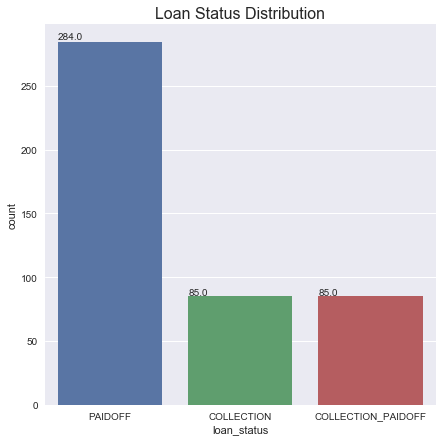

In [21]:
fig = plt.figure(figsize=(7,7))

ax = sns.countplot(orig_data['loan_status'])
ax.set_title("Loan Status Distribution", size = 16)
get_height(ax)

In [22]:
pd.DataFrame(orig_data.groupby('loan_status')['Loan_ID'].count())

,Loan_ID
loan_status,
COLLECTION,85
COLLECTION_PAIDOFF,85
PAIDOFF,284


#### Take Away:
From the graph and table it's evident that maximum people have PAIDOFF loan status.

### 2. PRINCIPAL AMOUNT AND LOAN STATUS RELATION:
* Principal : Basic principal loan amount at the origination



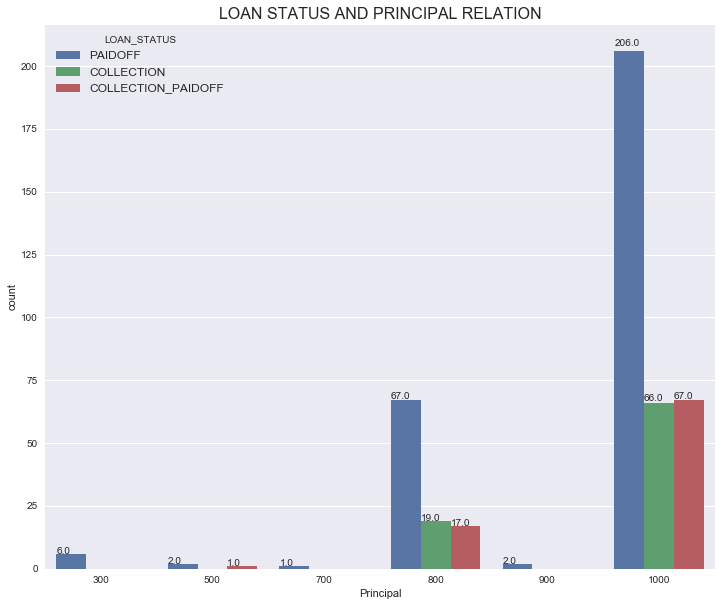

In [23]:
plt.figure(figsize=(12, 10))

ax = sns.countplot(x='Principal', hue = "loan_status", data = orig_data)
plt.legend(title = "LOAN_STATUS",loc='upper left', fontsize='12')
ax.set_title("LOAN STATUS AND PRINCIPAL RELATION", size = 16)

get_height(ax)

In [24]:
pd.crosstab(orig_data.loan_status, orig_data.Principal, margins=True)

Principal,300,500,700,800,900,1000,All
loan_status,,,,,,,
COLLECTION,0,0,0,19,0,66,85
COLLECTION_PAIDOFF,0,1,0,17,0,67,85
PAIDOFF,6,2,1,67,2,206,284
All,6,3,1,103,2,339,454


In [25]:
pd.DataFrame(orig_data.groupby(['Principal','loan_status'])['Loan_ID'].count())

Loan_ID
Principal loan_status                
300       PAIDOFF                   6
500       COLLECTION_PAIDOFF        1
          PAIDOFF                   2
700       PAIDOFF                   1
800       COLLECTION               19
          COLLECTION_PAIDOFF       17
          PAIDOFF                  67
900       PAIDOFF                   2
1000      COLLECTION               66
          COLLECTION_PAIDOFF       67
          PAIDOFF                 206

#### Take Away:
From the graph and the table, it can be seen that majority have principal of 1000 with maximum people having PAIDOFF status on loan.

### 3. TERMS:
* Terms are divided into 3 section depending on the number of days as weekly (7), biweekly (14), monthly (30).


In [26]:
terms = pd.DataFrame(orig_data.groupby('terms')['Loan_ID'].count())
terms

,Loan_ID
terms,
7,21
15,191
30,242


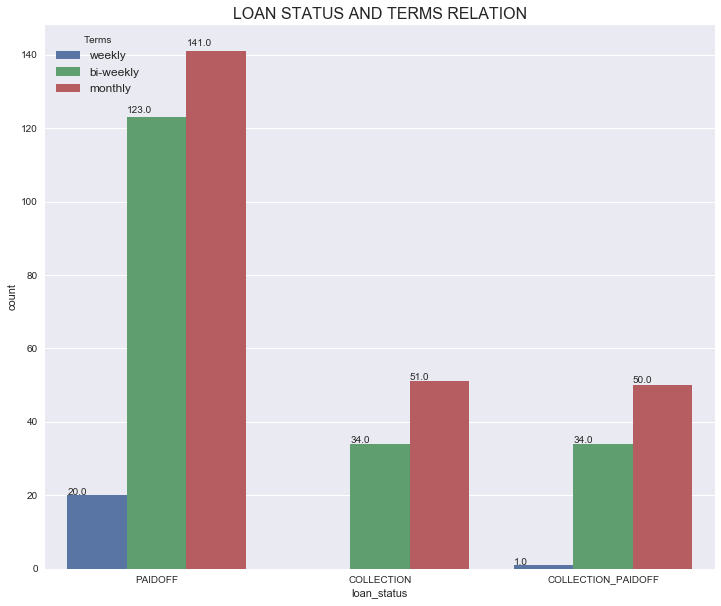

In [27]:
plt.figure(figsize=(12, 10))

# Terms can be labelled as weekly (7), biweekly (14), monthly (30)
mapTerms={7:'weekly', 15:'bi-weekly', 30: 'monthly'}
# ax = sns.barplot(x='loan_status',y='terms',hue='terms',data=orig_data)
ax = sns.countplot(hue='terms', x = "loan_status", data=orig_data)
plt.legend(title ="Terms", labels=[mapTerms[l] for l in list(terms.index)], loc='upper left', fontsize='12')
ax.set_title("LOAN STATUS AND TERMS RELATION",size = 16)
get_height(ax)

PIE CHART FOR TERMS DISTRIBUTION


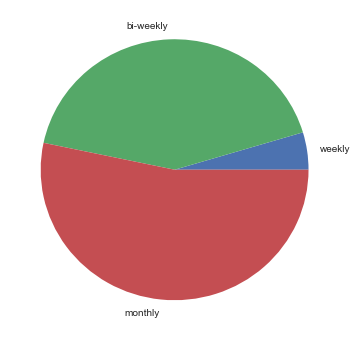

In [28]:
fig, ax = plt.subplots(figsize=(6,6))
pos = np.arange(len(orig_data.terms.unique()))
pie = ax.pie(terms, labels=[mapTerms[l] for l in list(terms.index)])
print(colored("PIE CHART FOR TERMS DISTRIBUTION", "red"))

#### Take Away:
* From the we can say that majority of people have loan on monthly payoff schedule.
* The pichart gives more clear cut representation of term distribution

### 4.  EFFECTIVE DATE, DUE DATE, PAID OFF TIME, PAST DUE DAYS
* Effective_date: When the loan got originated and took effects
* Due_date: Since it’s one-time payoff schedule, each loan has one single due date
* Paidoff_time: The actual time a customer pays off the loan
* Pastdue_days: How many days a loan has been past due

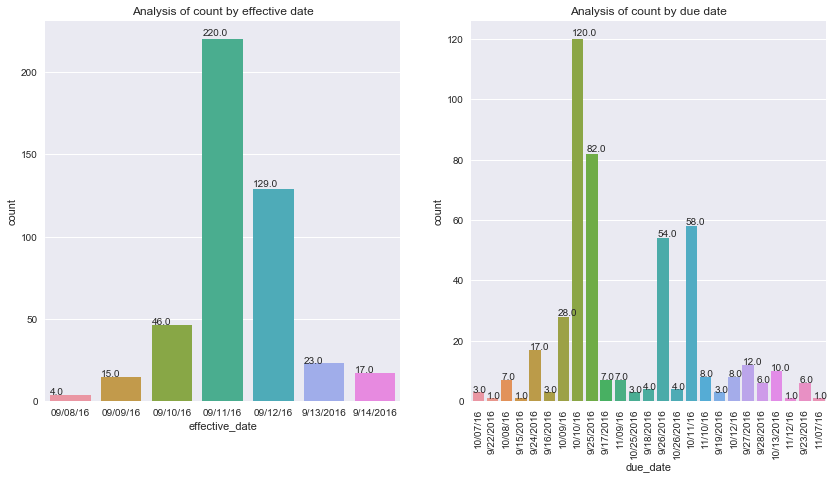

In [29]:
fig, axs = plt.subplots(1,2, figsize=(14, 7))
ax1 = sns.countplot(orig_data['effective_date'], ax = axs[0])
ax1.set_title("Analysis of count by effective date", size = 12)
get_height(ax1)

ax2 = sns.countplot(orig_data['due_date'], ax = axs[1])
ax2.set_title("Analysis of count by due date",size = 12)
loc, labels = plt.xticks()
ax2.set_xticklabels(labels, rotation=90)
get_height(ax2)


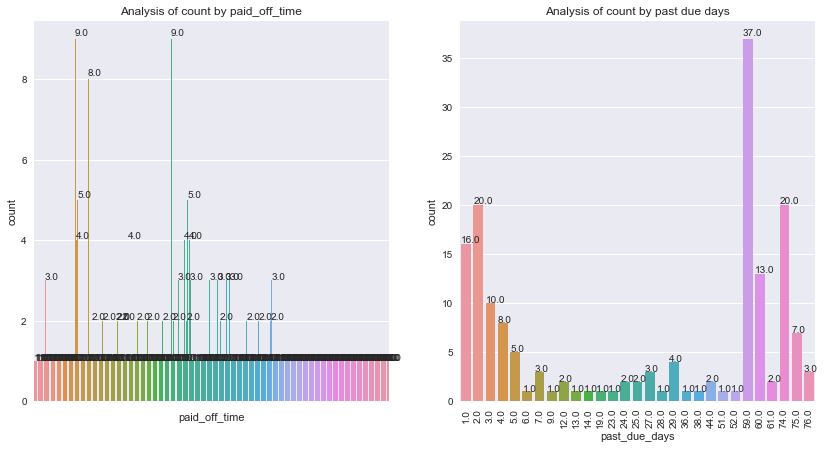

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
ax3 = sns.countplot(orig_data['paid_off_time'], ax = axs[0])
ax3.set_title("Analysis of count by paid_off_time", size = 12)
loc, labels = plt.xticks()
ax3.set_xticklabels(labels, rotation=90)
get_height(ax3)

ax4 = sns.countplot(orig_data['past_due_days'], ax = axs[1])
ax4.set_title("Analysis of count by past due days",size = 12)
loc, labels = plt.xticks()
ax4.set_xticklabels(labels, rotation=90)
get_height(ax4)

### Take Away:
These four attributes are related to date and time. 

### 5.  AGE, EDUCATION and GENDER
* Age, education, gender : A customer’s basic demographic information

#### AGE

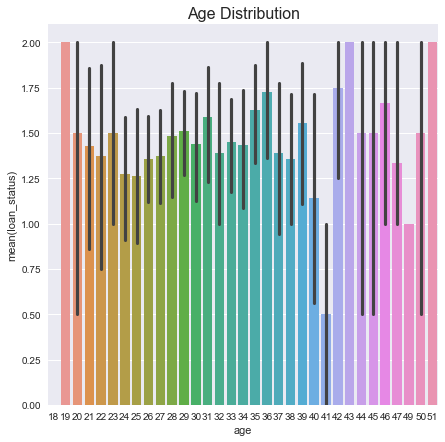

In [31]:
fig, ax = plt.subplots(figsize=(7,7))
a = sns.barplot(x='age',y='loan_status',data=data)
a.set_title("Age Distribution", size = 16)


In [32]:
# pd.crosstab(orig_data.loan_status,orig_data.age , margins=True)

#### GENDER

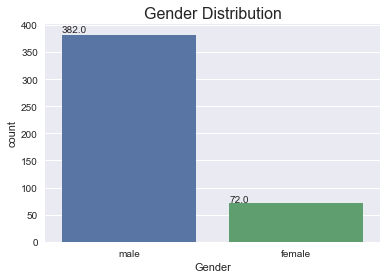

In [33]:
b = sns.countplot(x='Gender',data=orig_data)
b.set_title("Gender Distribution", size = 16)
get_height(b)

In [34]:
pd.crosstab(orig_data.loan_status,orig_data.Gender, margins=True)

Gender,female,male,All
loan_status,,,
COLLECTION,9,76,85
COLLECTION_PAIDOFF,13,72,85
PAIDOFF,50,234,284
All,72,382,454


#### EDUCATION

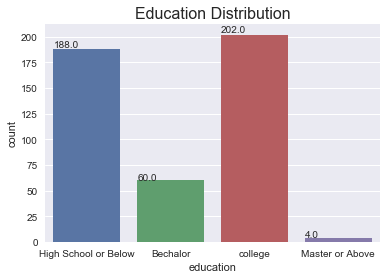

In [35]:
c = sns.countplot(x='education',data=orig_data)
c.set_title("Education Distribution", size =16)
get_height(c)

In [36]:
pd.crosstab(orig_data.loan_status,orig_data.education, margins=True)

education,Bechalor,High School or Below,Master or Above,college,All
loan_status,,,,,
COLLECTION,10,41,1,33,85
COLLECTION_PAIDOFF,13,30,0,42,85
PAIDOFF,37,117,3,127,284
All,60,188,4,202,454


### Take Away:
* AGE: The age group is pretty well distributed from age 18 to 51
* GENDER: Number of male is almost 5 times more than that of female
* EDUCATION: Maximum of people are from college and high-school

In [37]:
# # ax1 = fig.add_subplot(111)
# plt.plot( data.loan_status, data.age)
# plt.plot(data.loan_status,data.education)



#### EDUCATION DISTRIBUTION BASED ON GENDER

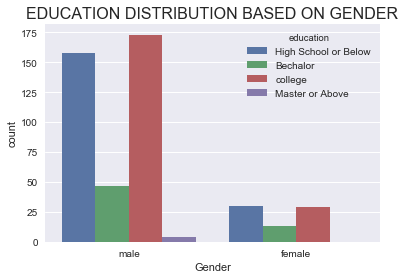

In [38]:
c1 = sns.countplot(x='Gender', data=orig_data, hue='education')
c1.set_title("EDUCATION DISTRIBUTION BASED ON GENDER",size = 16)

#### EDUCATION DISTRIBUTION BASED ON LOAN STATUS

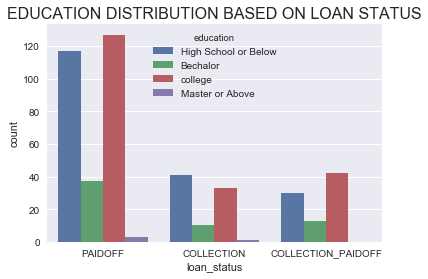

In [39]:
c2 = sns.countplot(x='loan_status', data=orig_data, hue='education')
c2.set_title("EDUCATION DISTRIBUTION BASED ON LOAN STATUS",size = 16)

#### RELATION B/W LOAN_STATUS, GENDER and AGE

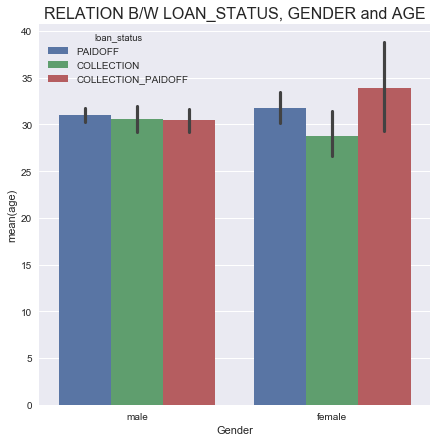

In [40]:
fig, ax = plt.subplots(figsize=(7,7))
ax = sns.barplot(hue = "loan_status", y = "age", x = "Gender", data=orig_data)
ax.set_title("RELATION B/W LOAN_STATUS, GENDER and AGE",size = 16)

#### RELATION B/W LOAN_STATUS, AGE and EDUCATION

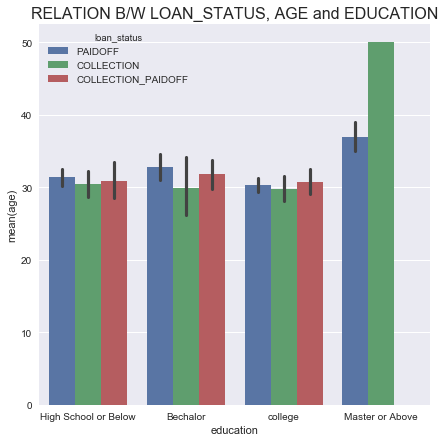

In [41]:
fig, ax = plt.subplots(figsize=(7,7))
ax = sns.barplot(hue = "loan_status", y = "age", x = "education", data=orig_data)
ax.set_title("RELATION B/W LOAN_STATUS, AGE and EDUCATION",size = 16)

### NOTE:
At this point I'll like to prepare the data for testing by removing target variable i.e. loan_status from the dataframe under investigation.Making a heatmap hence forward will be wiser step.

In [42]:
# CREATING FINAL DATA UNDER INVESTIGATION AND TARGET FOR PREDICTION

# created here beacuse it was required for me to make heatmap which
# I wanted to exmaine without involvement of target varaible.

dui = data.drop(['loan_status'], axis = 1)
target = data.loan_status

## HEATMAP
* Preferable method to get correlation between all numeric attributes of the dataset.
* Highly correlated columns often tend to add redundant feature nature.
* To avoid over-fitting and get accurate results it is recommended to remove one of two highly correlated attributes/columns.

HEATMAP


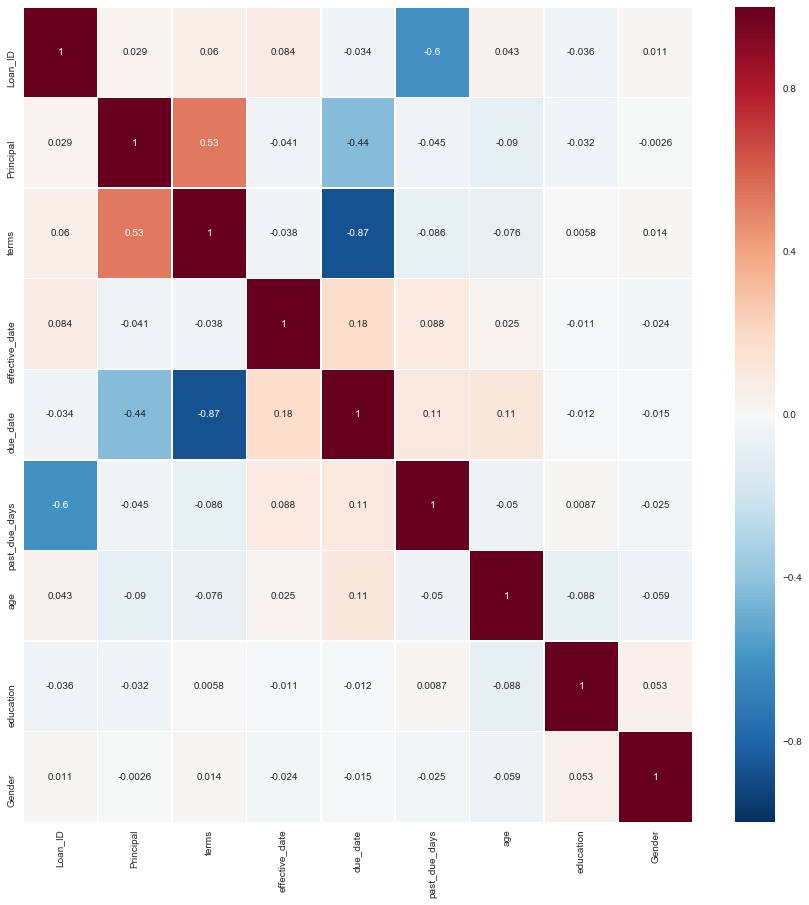

In [43]:
# HEATMAP VISUALIZARION (does multivarite data analysis)

fig, ax = plt.subplots(figsize=(15,15))

corr = dui.corr()
heatmap = sns.heatmap(corr, annot=True, linewidths=.5,  ax=ax)

loc, labels = plt.xticks()
heatmap.set_xticklabels(labels, rotation=90)


print("HEATMAP")

### Tale Away:
*  ATTRIBUTES WITH HIGH CORRELATION:
    * terms and Principal
    * terms and due_date
    * Loan_ID and past_due_days
    * Principal and due_date
    
   

#### FINAL TAKE AWAY FROM VISUALIZING DATA AND MAINLY HEATMAP:
* Highly correlated (negatively or positively) columns will be removed as ideally practiced beacuse it is in a sense, a redundancy in features of a dataset.
* Also from above visualizations we also realize that paid_off_date seems to be not so important either. 
 
* After observing the above heatmap and keeping in mind the above point, the following features will be dropped/removed:
    * Loan_ID
    * terms
    * due_date
    * paid_off_date
    * effective_date



In [44]:
data = dui.drop(['Loan_ID', 'terms', 'due_date', 'paid_off_date', 'effective_date'], axis=1)

In [45]:
data.head()

,Principal,past_due_days,age,education,Gender
0,1000,86,45,1,1
1,1000,167,50,0,0
2,1000,166,33,0,0
3,1000,165,27,3,1
4,1000,164,28,3,0


#### HEATMAP

HEATMAP Axes(0.125,0.125;0.62x0.755)


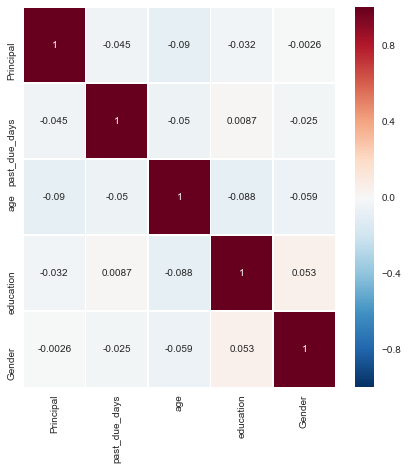

In [46]:
fig, ax = plt.subplots(figsize=(7,7))

corr = data.corr()
heatmap = sns.heatmap(corr, annot=True, linewidths=.5,  ax=ax)

loc, labels = plt.xticks()
heatmap.set_xticklabels(labels, rotation=90)

print("HEATMAP", heatmap)

### TAKE AWAY:
* Since, after observing the heatmap at this stage no high correlation is noticed so I decided to go further with this dataset.
* Since I already separated data_under_investigation and target earlier it will be used for prediction


# PREDICTION TIME!!!
* This section is going to be more of a text and try then learn kind of work route.
* Almost enough algorithms or methods will be tried for classification of loan_status.
* By the end a comparative study will help to know which is the best method

### Defining Labels

In [47]:
orig_data.loan_status.unique()

array(['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'], dtype=object)

In [48]:
### Common need for all models
labels = ['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF']

### HELPER FUNCTION TO CALCULATE CLASSIFICATION REPORT


In [49]:
def plot_classification_report(ytest, pred):
    print(colored("CLASSIFICATION REPORT:", "green", attrs=['bold','underline']))
    print(classification_report(ytest, pred ,target_names=labels))

### HELPER FUNCTION TO CALCULATE CONFUSION MATRIX 


In [50]:
def plot_confusion_matrix(ytest, pred):
    print(colored("CONFUSION MATRIX:", "green", attrs=['bold','underline']))
          
    cm = confusion_matrix(y_true=ytest, y_pred=pred)
          
    for i in range(len(labels)):
        class_name  = "({}) : {}".format(i, labels[i])
        print(cm[i], class_name)
    
    class_numbers = [" ({0})".format(i) for i in range(len(labels))]
    print("".join(class_numbers))

### Setting target and dataframe

In [51]:
x = data
y = target

In [52]:
x.head()

,Principal,past_due_days,age,education,Gender
0,1000,86,45,1,1
1,1000,167,50,0,0
2,1000,166,33,0,0
3,1000,165,27,3,1
4,1000,164,28,3,0


In [53]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: loan_status, dtype: int64

### TEST TRAIN SPLIT

In [54]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state=42)

# PREDICTING LOAN_STATUS

### Method 1: Decision Tree Classifier

In [55]:
## CLASSIFICATION
dtree = DecisionTreeClassifier(random_state= 42)
dtree.fit(xtrain, ytrain)
pred1 = dtree.predict(xtest)
s1 = dtree.score(xtest, ytest)
scores1 = cross_val_score(dtree, xtrain, ytrain, cv=10, scoring='accuracy') 

print(colored("DECISION TREE CLASSIFIER RESULTS:", "green", attrs=['bold','underline']))
print("Score by classifier      : {0:.2%}".format(s1))              
print("Score by cross_val_score : {0:.2%}".format(scores1.mean()),"\n")



## CLASSIFICATION REPORT
plot_classification_report(ytest, pred1)


## CONFUSION MATRIX
plot_confusion_matrix(ytest, pred1)



DECISION TREE CLASSIFIER RESULTS:
Score by classifier      : 96.70%
Score by cross_val_score : 99.17% 

CLASSIFICATION REPORT:
                    precision    recall  f1-score   support

           PAIDOFF       0.86      0.92      0.89        13
        COLLECTION       0.95      0.90      0.93        21
COLLECTION_PAIDOFF       1.00      1.00      1.00        57

       avg / total       0.97      0.97      0.97        91

CONFUSION MATRIX:
[12  1  0] (0) : PAIDOFF
[ 2 19  0] (1) : COLLECTION
[ 0  0 57] (2) : COLLECTION_PAIDOFF
 (0) (1) (2)


### Method 2: Random Forest Classifier

In [56]:
## CLASSIFICATION
rforest = RandomForestClassifier(random_state=42)
rforest.fit(xtrain, ytrain)
pred2 = rforest.predict(xtest)
s2 = rforest.score(xtest, ytest)
scores2 = cross_val_score(rforest, xtrain, ytrain, cv=10, scoring='accuracy') 

print(colored("DECISION TREE CLASSIFIER RESULTS:", "green", attrs=['bold','underline']))
print("Score by classifier      : {0:.2%}".format(s2))              
print("Score by cross_val_score : {0:.2%}".format(scores2.mean()),"\n")


## CLASSIFICATION REPORT
plot_classification_report(ytest, pred2)


## CONFUSION MATRIX
plot_confusion_matrix(ytest, pred2)


DECISION TREE CLASSIFIER RESULTS:
Score by classifier      : 97.80%
Score by cross_val_score : 98.07% 

CLASSIFICATION REPORT:
                    precision    recall  f1-score   support

           PAIDOFF       0.87      1.00      0.93        13
        COLLECTION       1.00      0.90      0.95        21
COLLECTION_PAIDOFF       1.00      1.00      1.00        57

       avg / total       0.98      0.98      0.98        91

CONFUSION MATRIX:
[13  0  0] (0) : PAIDOFF
[ 2 19  0] (1) : COLLECTION
[ 0  0 57] (2) : COLLECTION_PAIDOFF
 (0) (1) (2)


### Method 3: K-Nearest Neighbours

#### Trying to play about selection of K

In [57]:
neigh = [i for  i in range(3,25)]

#### When accuracy is measures using cross_val_score

In [58]:
score = []
for k in neigh:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    scores = cross_val_score(knn, xtrain, ytrain, cv=10, scoring='accuracy')  
    score.append(scores.mean())

# len(score)
# len(neigh)

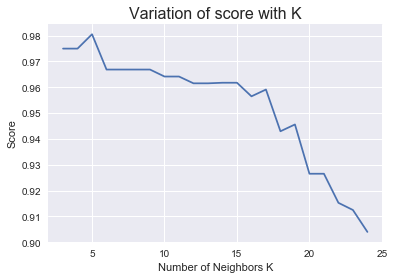

In [59]:
plt.plot(neigh, score)
plt.title("Variation of score with K",size = 16)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Score')
plt.show()

* Finding optimal value of K

In [60]:
error = [1 - x for x in score]
optimal_k = neigh[error.index(min(error))]
print("Optimal Value of K: ", optimal_k)

Optimal Value of K:  5


#### When accuracy is measures using cross_val_score

In [61]:
sc = []
for k in neigh:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    s = knn.score(xtest, ytest)
    sc.append(s)

# len(score)
# len(neigh)

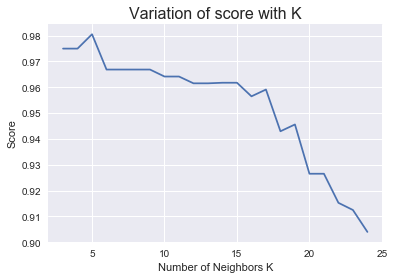

In [62]:
plt.plot(neigh, score)
plt.title("Variation of score with K", size = 16)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Score')
plt.show()

* Finding optimal value of K

In [63]:
error = [1 - x for x in sc]
optimal_k = neigh[error.index(min(error))]
print("Optimal Value of K: ", optimal_k)

Optimal Value of K:  5


#### Final optimal value of K = 5

In [64]:
## CLASSIFICATION
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)
pred3 = knn.predict(xtest)
s3 = knn.score(xtest, ytest)
scores3 = cross_val_score(rforest, xtrain, ytrain, cv=10, scoring='accuracy') 

print(colored("DECISION TREE CLASSIFIER RESULTS:", "green", attrs=['bold','underline']))
print("Score by classifier      : {0:.2%}".format(s3))              
print("Score by cross_val_score : {0:.2%}".format(scores3.mean()),"\n")


## CLASSIFICATION REPORT
plot_classification_report(ytest, pred3)


## CONFUSION MATRIX
plot_confusion_matrix(ytest, pred3)


DECISION TREE CLASSIFIER RESULTS:
Score by classifier      : 96.70%
Score by cross_val_score : 98.07% 

CLASSIFICATION REPORT:
                    precision    recall  f1-score   support

           PAIDOFF       0.87      1.00      0.93        13
        COLLECTION       1.00      0.90      0.95        21
COLLECTION_PAIDOFF       0.98      0.98      0.98        57

       avg / total       0.97      0.97      0.97        91

CONFUSION MATRIX:
[13  0  0] (0) : PAIDOFF
[ 1 19  1] (1) : COLLECTION
[ 1  0 56] (2) : COLLECTION_PAIDOFF
 (0) (1) (2)


### Method 4: SVM Classifier (linear kernel)

In [65]:
c_val = np.array([0.5, 0.1, 1, 5, 10])

In [66]:
score = []
for c in c_val:
    svc_linear = SVC(kernel='linear', random_state= 42, C = c)
    svc_linear.fit(xtrain, ytrain)
    s = svc_linear.score(xtest, ytest)
    score.append(s)
    
# len(score)  

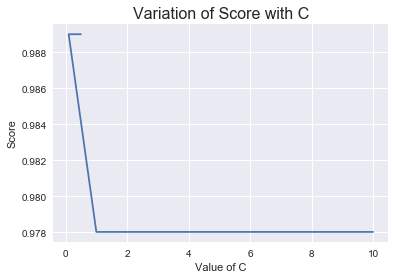

In [67]:
plt.plot(c_val, score)
plt.title("Variation of Score with C", size = 16)
plt.xlabel('Value of C')
plt.ylabel('Score')
plt.show()

#### Take Away:
From the above plot the closest value of C is to 1 the more the score.
This chosing c = 0.1

In [68]:
## CLASSIFICATION
svcl = SVC(kernel='linear', C=0.1)
svcl.fit(xtrain, ytrain)
pred4 = svcl.predict(xtest)
s4 = svcl.score(xtest, ytest)
scores4 = cross_val_score(svcl, xtrain, ytrain, cv=10, scoring='accuracy') 

print(colored("DECISION TREE CLASSIFIER RESULTS:", "green", attrs=['bold','underline']))
print("Score by classifier      : {0:.2%}".format(s4))              
print("Score by cross_val_score : {0:.2%}".format(scores4.mean()),"\n")


## CLASSIFICATION REPORT
plot_classification_report(ytest, pred4)


## CONFUSION MATRIX
plot_confusion_matrix(ytest, pred4)


DECISION TREE CLASSIFIER RESULTS:
Score by classifier      : 98.90%
Score by cross_val_score : 98.32% 

CLASSIFICATION REPORT:
                    precision    recall  f1-score   support

           PAIDOFF       0.93      1.00      0.96        13
        COLLECTION       1.00      0.95      0.98        21
COLLECTION_PAIDOFF       1.00      1.00      1.00        57

       avg / total       0.99      0.99      0.99        91

CONFUSION MATRIX:
[13  0  0] (0) : PAIDOFF
[ 1 20  0] (1) : COLLECTION
[ 0  0 57] (2) : COLLECTION_PAIDOFF
 (0) (1) (2)


### Method 5: SVM Classifier (rbf kernel)

In [69]:
clf_rbf = SVC(kernel='rbf', C=3)

In [70]:
c_val = np.array([0.5, 0.1, 1, 5, 10])

In [71]:
score = []
for c in c_val:
    svc_linear = SVC(kernel='rbf', random_state= 42, C = c)
    svc_linear.fit(xtrain, ytrain)
    s = svc_linear.score(xtest, ytest)
    score.append(s)
    
# len(score)  

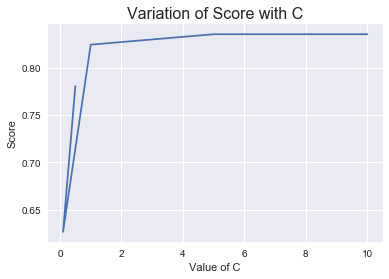

In [72]:
plt.plot(c_val, score)
plt.title("Variation of Score with C", size = 16)
plt.xlabel('Value of C')
plt.ylabel('Score')
plt.show()

#### Take Away:
From the above plot a value of C nearest to 5 will yield a good score.Chosing c = 5

In [73]:
## CLASSIFICATION
svcr = SVC(kernel='rbf', C=5)
svcr.fit(xtrain, ytrain)
pred5 = svcr.predict(xtest)
s5 = svcr.score(xtest, ytest)
scores5 = cross_val_score(svcr, xtrain, ytrain, cv=10, scoring='accuracy') 

print(colored("DECISION TREE CLASSIFIER RESULTS:", "green", attrs=['bold','underline']))
print("Score by classifier      : {0:.2%}".format(s5))              
print("Score by cross_val_score : {0:.2%}".format(scores5.mean()),"\n")


## CLASSIFICATION REPORT
plot_classification_report(ytest, pred5)


## CONFUSION MATRIX
plot_confusion_matrix(ytest, pred5)


DECISION TREE CLASSIFIER RESULTS:
Score by classifier      : 83.52%
Score by cross_val_score : 89.51% 

CLASSIFICATION REPORT:
                    precision    recall  f1-score   support

           PAIDOFF       0.92      0.85      0.88        13
        COLLECTION       1.00      0.38      0.55        21
COLLECTION_PAIDOFF       0.80      1.00      0.89        57

       avg / total       0.86      0.84      0.81        91

CONFUSION MATRIX:
[11  0  2] (0) : PAIDOFF
[ 1  8 12] (1) : COLLECTION
[ 0  0 57] (2) : COLLECTION_PAIDOFF
 (0) (1) (2)


### TABULATING THE OBSERVATIONS

In [74]:
models = pd.DataFrame({
        'Model'          : ['Decision Tree', 'Random Forest', 'K-Nearest', 'SVM_Linear', 'SVM_RBF'],
        'Classifier_Score'  : [s1*100, s2*100, s3*100, s4*100, s5*100],
        'Cross_val_Score'  : [scores1.mean()*100, scores2.mean()*100, scores3.mean()*100, scores4.mean()*100, scores5.mean()*100]
    
    })
models.sort_values(by='Classifier_Score', ascending=False)

,Classifier_Score,Cross_val_Score,Model
3,98.901099,98.316207,SVM_Linear
1,97.802198,98.068493,Random Forest
0,96.703297,99.165414,Decision Tree
2,96.703297,98.068493,K-Nearest
4,83.516484,89.509562,SVM_RBF


### FINAL TAKE AWAY!!!

#### HIGHEST ACCURACY MODEL = SVM_LINEAR
#### Classifier_score = 98.90 %

#### HIGHEST ACCURACY MODEL WHEN CROSS_VAL_SCORE CONSIDERED = DECISION TREE
#### Cross_val_score = 99.16 % 

As per the classifier score, SVM with linear kernel does the best job. Even it's confusion matrix shows how well it predicts the values.

In [75]:
# model = Sequential()
# model.add(Dense(64, input_dim=4, init='uniform', activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])